<a href="https://colab.research.google.com/github/aitorer/Entrega-Practicas-/blob/main/Copia_de_TADM2022_2a_Razonamiento_Borroso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Sistema Borroso
 

Vamos a crear un sistema de control borroso que modela cómo se puede evaluar la capacidad de un cliente para pedir un préstamo. Cuando se tiene que dar un préstamos se considerará la edad del peticionario, la cantidad del préstamos, la duración y los pagos en los que se divide. FInalmente nos dará una puntuación de 0 a 10 al préstamo. 


## Preliminares

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

* instalación de scikit-fuzzy

In [ ]:
# https://pythonhosted.org/scikit-fuzzy/
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.2 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=45beaab3aa07558232023b530a857febf5b4b75d18512954366056975cd5a409
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


* importación de librerías


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##  Sistema Borroso

Definimos los Antecedentes
* Edad del cliente
* pagos mensuales
* Cantidad del Préstamo
* Duración de la Amortización (min: 12 max 60)



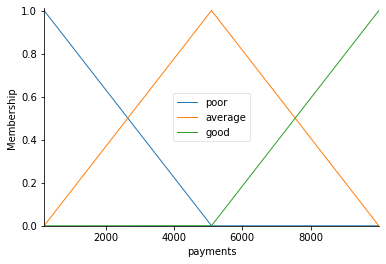

In [ ]:
# nombre: 'payments'
# rango/dominio: np.arange(200, 10000, 1)
payments = ctrl.Antecedent(np.arange(200, 10000, 1), 'payments')
payments.automf(3) # número de etiquetas
payments.view()

Hemos obtenido los pagos y se han etiquetado

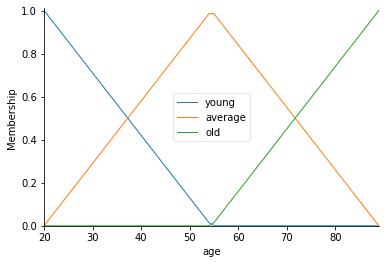

In [ ]:
age = ctrl.Antecedent(np.arange(20,90, 1), 'age')
age.automf(3, names = ["young", "average", "old"])
age.view()

Se ha obtenido el rango de edad y se ha etiquetado

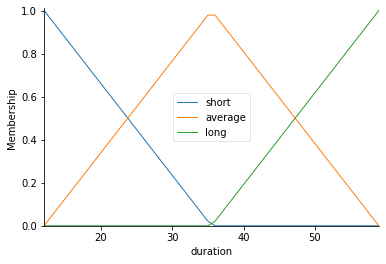

In [ ]:
duration = ctrl.Antecedent(np.arange(12, 60, 1), 'duration')
duration.automf(3, names=["short", "average", "long"])
duration.view()

Se ha obtenido el rango de duracion y se ha etiquetado

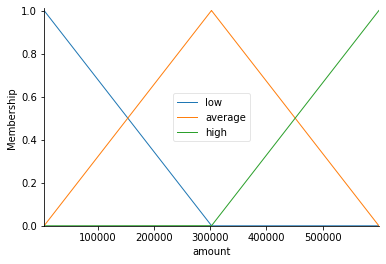

In [ ]:
amount = ctrl.Antecedent(np.arange(5000, 600000, 1), 'amount')
amount.automf(3,  names = ["low","average","high"])
amount.view()

Se ha obtenido las diferentes cantidades y se han etiquetado

Definimos el consecuente

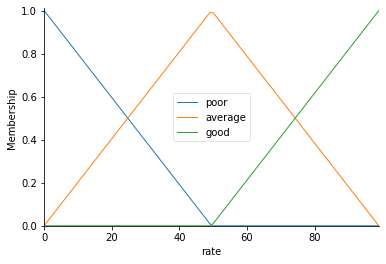

In [ ]:
rate = ctrl.Consequent(np.arange(0, 100, 1), 'rate')
rate.automf(3)
rate.view()


## Reglas borrosas
-----------
Son reglas introducidad por el profesor de las cuales puede ser que se cumpla alguna o ninguna

Ahora, para hacer estos triángulos útiles, definimos la *relación borrosa*
entre las variables de entrada y salida. Para el ejemplo vamos a considerar las siguientes reglas simples (para hacer un sistema completo se necesitarían algunas más) 

1. Si la duración y la cantidad son pequeñas entonces la calificación será buena.
2. Si la cantidad es alta, los pagos pequeños y la duración alta entonces la calificación será *pobre*
3. Si la cantidad es media y los pagos también medios si la edad del cliente es baja entonces el rating es medio. 

La clave de estas reglas es que son borrosas, es decir que expresamos la información de forma lingüística intentando manejar la incertidumbre inherente. 



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4f7995ef10>)

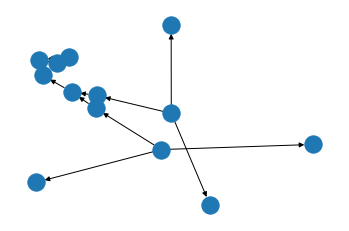

In [ ]:
rule1 = ctrl.Rule(duration['short'] & amount['low'], rate['good'])
rule2 = ctrl.Rule(amount['high'] & payments['average'] & duration["long"], rate["poor"])
rule3 = ctrl.Rule(age['young'] & amount['average'], rate['average'])

rule1.view()

Ahora que tenemos nuestras reglas definidas, podemos simplemente crear un sistema de control vía:

In [ ]:
rating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
rating_ctrl.graph

Con el fin de simular este sistema de control, crearemos un
"Sistema de Control y Simulación".  Este objeto que representa al controlador aplicado a un conjunto específico de circunstancias.  

El siguiente comando sirve para crear el sistema de inferencia


In [ ]:
rating = ctrl.ControlSystemSimulation(rating_ctrl)

Ahora podemos simular nuestro sistema de control simplemente especificando las entradas y llamando al método *compute*.  

Supongamos que un cliente de 40 años va a pedir un préstamos a 12 años con pagos de 2000 y una cantidad de 300000

In [ ]:
rating.input['age'] = 30
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000


Se tiene una entrada númerica, luego se infiere y finalmente conseguimos la salida


44.52999446644107


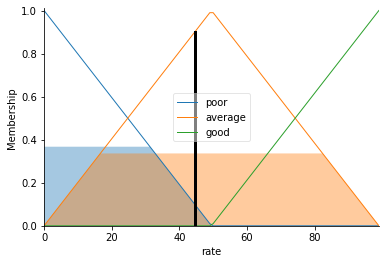

In [ ]:
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

La linea negra de color vertical que se ha obtenido refleja el centro de gravedad